不管是哪种数据结构，__字符串__、__列表__、__字节序列__、__数组__、__XML 元素__，
抑或是__数据库查询结果__，它们都共用一套丰富的操作：_迭代_、_切片_、_排序_，还有_拼接_。

深入理解 Python 中的不同序列类型，不但能让我们避免重新发明轮子，
它们的 API 还能帮助我们把自己定义的 API 设计得跟原生的序列一样，
或者是跟未来可能出现的序列类型保持兼容。

# 内置序列类型概览

__容器序列__存放的是它们所包含的任意类型的对象的引用，而__扁平序列__
里存放的是值而不是引用。

    换句话说，扁平序列其实是一段_连续的内存空间_。由此可见扁平序列其实更加紧凑，但是它里面只能存放诸如字符、字节和数值这种基础类型。

1. 容器序列  
    `list`、`tuple` 和 `collections.deque` 这些序列能存放不同类型的数据。

1. 扁平序列  
    `str`、`bytes`、`bytearray`、`memoryview` 和 `array.array`，这类序列只能容纳一种类型。


__序列类型__的另一种分类法：

1. 可变序列 _MutableSequence_  
    `list`、`bytearray`、`array.array`、`collections.deque` 和
`memoryview`。
1. 不可变序列 _Sequence_  
    `tuple`、`str` 和 `bytes`。



虽然内置的序列类型并不是直接从 `Sequence` 和
`MutableSequence` 这两个抽象基类（`Abstract Base Class`，`ABC`）继承
而来的，但是了解这些基类可以帮助我们总结出那些完整的序列类型包
含了哪些功能。

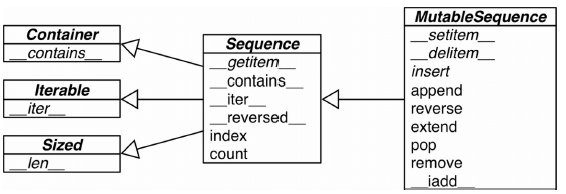



# 列表推导和生成器表达式

很多 Python 程序员都把列表推导（`list comprehension`）简称为
`listcomps`，生成式表达器（`generator expression`）则称为 `genexps`。
我有时也会这么用。

## 列表推导和可读性

In [5]:
symbols = '$￠￡￥€¤'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))
codes

[36, 65504, 65505, 65509, 8364, 164]

In [6]:
symbols = '$￠￡￥€¤'
codes = [ord(symbol) for symbol in symbols]
codes

[36, 65504, 65505, 65509, 8364, 164]

通常的__原则__是，只用列表推导来创
建新的列表，并且尽量保持简短。如果列表推导的代码超过了两行，你
可能就要考虑是不是得用 `for` 循环重写了。就跟写文章一样，并没有什
么硬性的规则，这个度得你自己把握。

### 句法提示
Python 会忽略代码里 `[]`、`{}` 和 `()` 中的换行，因此如果你的代码里
有多行的列表、列表推导、生成器表达式、字典这一类的，可以省
略不太好看的续行符 `\`。

### 列表推导不会再有变量泄漏的问题

Python2中可能有变量泄露问题，Python3中不会出现。

In [7]:
x = 'my precious'
dummy = [x for x in 'ABC']
x

'my precious'

列表推导、生成器表达式，以及同它们很相似的集合（`set`）推导和字典（`dict`）推导，在 Python 3 中都有了自己的局部作用域，就像函数似的。表达式内部的变量和赋值只在局部起作用，表达式的上下文里的同名变量还可以被正常引用，局部变量并不会影响到它们。

In [9]:
x = 'ABC'
dummy = [ord(x) for x in x]
x
dummy

'ABC'

[65, 66, 67]

## 列表推导同`filter`和`map`的比较

`filter` 和 `map` 合起来能做的事情，列表推导也可以做，而且还不需要
借助难以理解和阅读的 `lambda` 表达式。

这两种方法的速度快慢不一定。有时候列表推导反而会快一些。

In [13]:
symbols = '$￠￡￥€¤'
%timeit beyond_ascii = [ord(s) for s in symbols if ord(s) > 127]
beyond_ascii

%timeit beyond_ascii = list(filter(lambda c: c > 127, map(ord, symbols)))
beyond_ascii

1.24 µs ± 36.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


[65504, 65505, 65509, 8364, 164]

1.81 µs ± 33.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


[65504, 65505, 65509, 8364, 164]

### 笛卡儿积

含有 `4` 种花色和 `3` 种牌面的列表的笛卡儿积，结果是一个包
含 `12` 个元素的列表。

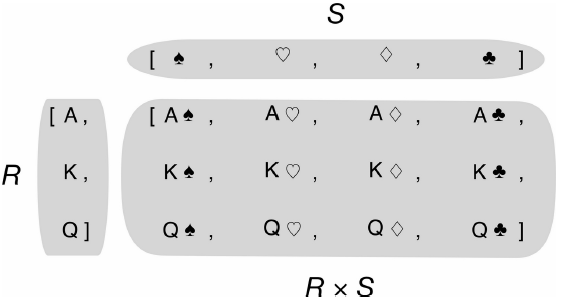

In [16]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes] # 这里得到的结果是先以颜色排列，再以尺码排列。
tshirts

for color in colors:  #注意，这里两个循环的嵌套关系和上面列表推导中 for 从句的先后顺序一样。
    for size in sizes:
        print((color, size))


tshirts = [(color, size) for size in sizes 
           for color in colors] # 如果想依照先尺码后颜色的顺序来排列，只需要调整从句的顺序。
                                # 我在这里插入了一个换行符，这样顺序安排就更明显了。
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

列表推导的作用只有一个：__生成列表__。如果想生成其他类型的序列，生成器表达式就派上了用场。

### 生成器表达式

虽然也可以用列表推导来初始化_元组_、_数组_或其他_序列_类型，但是生成
器表达式是更好的选择。这是因为生成器表达式背后遵守了迭代器协
议，可以逐个地产出元素，而不是先建立一个完整的列表，然后再把这
个列表传递到某个构造函数里。前面那种方式显然能够节省内存。

生成器表达式的语法跟列表推导差不多，只不过把方括号换成圆括号而
已。

In [17]:
symbols = '$￠￡￥€¤'
tuple(ord(symbol) for symbol in symbols) #如果生成器表达式是一个函数调用过程中的唯一参数，那么不需要额外再用括号把它围起来。

import array
array.array('I', (ord(symbol) for symbol in symbols)) # array 的构造方法需要两个参数，因此括号是必需的。
                                                        # array 构造方法的第一个参数指定了数组中数字的存储方式。

(36, 65504, 65505, 65509, 8364, 164)

array('I', [36, 65504, 65505, 65509, 8364, 164])

下面的例子是利用生成器表达式实现了一个笛卡儿积，用以打印出上文
中我们提到过的 T 恤衫的 2 种颜色和 3 种尺码的所有组合。与之前
不同的是，用到生成器表达式之后，内存里不会留下一个有 6 个组合的
列表，因为生成器表达式会在每次 for 循环运行时才生成一个组合。如
果要计算两个各有 1000 个元素的列表的笛卡儿积，生成器表达式就可
以帮忙省掉运行 for 循环的开销，即一个含有 100 万个元素的列表。

In [18]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes): # 生成器表达式逐个产出元素，从来不会一次性产出一个含有 6 个 T恤样式的列表。
    print(tshirt)

black S
black M
black L
white S
white M
white L


# 元组不仅仅是不可变的列表

## 元组和记录

元组其实是__对数据的记录__：元组中的每个元素都存放了记录中一个字段
的数据，外加这个字段的位置。正是这个位置信息给数据赋予了意义。

>如果只把元组理解为不可变的列表，那其他信息——它所含有的元素的
>总数和它们的位置——似乎就变得可有可无。但是如果把元组当作一些
>字段的集合，那么数量和位置信息就变得非常重要了。

In [19]:
lax_coordinates = (33.9425, -118.408056)  # 洛杉矶国际机场的经纬度。
city, year, pop, chg, area = (
    'Tokyo', 2003, 32450, 0.66, 8014
)  # 东京市的一些信息：市名、年份、人口（单位：百万）、人口变化（单位：百分比）和面积（单位：平方千米）。
traveler_ids = [
    ('USA', '31195855'),
    ('BRA', 'CE342567'),  # 一个元组列表，元组的形式为 (country_code, passport_number)。
    ('ESP', 'XDA205856')
]

for passport in sorted(traveler_ids):  # 在迭代的过程中，passport 变量被绑定到每个元组上。
    print('%s/%s' % passport)  # % 格式运算符能被匹配到对应的元组元素上。

for country, _ in traveler_ids:  # for 循环可以分别提取元组里的元素，也叫作拆包（unpacking）。
    # 因为元组中第二个元素对我们没有什么用，所以它赋值给“_”占位符。
    print(country)

BRA/CE342567
ESP/XDA205856
USA/31195855
USA
BRA
ESP


## 元组拆包

上面的例子中，我们把元组`('Tokyo', 2003, 32450, 0.66, 8014)` 里
的元素分别赋值给变量 `city`、`year`、`pop`、`chg` 和 `area`，而这所有的
赋值我们只用一行声明就写完了。同样，在后面一行中，一个 `%` 运算符
就把 `passport` 元组里的元素对应到了 `print` 函数的格式字符串空档
中。这两个都是对元组拆包的应用。

>元组拆包可以应用到任何可迭代对象上，唯一的硬性要求
>是，被可迭代对象中的元素数量必须要跟接受这些元素的元组的空
>档数一致。除非我们用 * 来表示忽略多余的元素，在“用 * 来处理
>多余的元素”一节里，我会讲到它的具体用法。

最好辨认的元组拆包形式就是__平行赋值__，也就是说把一个可迭代对象里
的元素，一并赋值到由对应的变量组成的元组中。

In [20]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates # 元组拆包
latitude
longitude

33.9425

-118.408056

另外一个很优雅的写法当属不使用中间变量交换两个变量的值：

In [22]:
a, b = (1, 2)
a, b
b, a = a, b
a, b

(1, 2)

(2, 1)

还可以用 `*` 运算符把一个可迭代对象拆开作为函数的参数：

In [23]:
divmod(20, 8)

t = (20, 8)
divmod(*t)

quotient, remainder = divmod(*t)
quotient, remainder

(2, 4)

(2, 4)

(2, 4)

下面是另一个例子，这里元组拆包的用法则是让一个函数可以用元组的
形式返回多个值，然后调用函数的代码就能轻松地接受这些返回值。比
如 `os.path.split()` 函数就会返回以路径和最后一个文件名组成的元
组 `(path, last_part)`:

>在进行拆包的时候，我们不总是对元组里所有的数据都感兴趣，`_` 占位符能帮助处理这种情况，下面这段代码也展示了它的用法。

>如果做的是国际化软件，那么 _ 可能就不是一个理想的占位
符，因为它也是 gettext.gettext 函数的常用别名，gettext 模
块的文档（https://docs.python.org/3/library/gettext.html )里提到了这
一点。在其他情况下，_ 会是一个很好的占位符。

In [24]:
import os
_, filename = os.path.split('/home/luciano/.ssh/idrsa.pub')
filename

'idrsa.pub'

除此之外，在元组拆包中使用 `*` 也可以帮助我们把注意力集中在元组的
部分元素上。  
用`*`来处理剩下的元素
在 Python 中，函数用 `*args` 来获取不确定数量的参数算是一种经典写
法了。  
于是 Python 3 里，这个概念被扩展到了平行赋值中：

In [25]:
a, b, *rest = range(5)
a, b, rest

a, b, *rest = range(3)
a, b, rest

a, b, *rest = range(2)
a, b, rest

(0, 1, [2, 3, 4])

(0, 1, [2])

(0, 1, [])

在平行赋值中，`*` 前缀只能用在一个变量名前面，但是这个变量可以出
现在赋值表达式的任意位置：

In [26]:
a, *body, c, d = range(5)
a, body, c, d

*head, b, c, d = range(5)
head, b, c, d

(0, [1, 2], 3, 4)

([0, 1], 2, 3, 4)

## 嵌套元组拆包

接受表达式的元组可以是嵌套式的，例如 `(a, b, (c, d))`。只要这个
接受元组的嵌套结构符合表达式本身的嵌套结构，Python 就可以作出正
确的对应。下面就是对嵌套元组拆包的应用。

In [28]:
metro_areas = [
('Tokyo','JP',36.933,(35.689722,139.691667)), # 每个元组内有 4 个元素，其中最后一个元素是一对坐标。
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]
print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas: # 我们把输入元组的最后一个元素拆包到由变量构成的元组里，这样就获取了坐标。
    if longitude <= 0: # if longitude <= 0: 这个条件判断把输出限制在西半球的城市。
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


>在 Python 3 之前，元组可以作为形参放在函数声明中，例如
>```python
def fn(a, (b, c), d):
```
然而 Python 3 不再支持这种格式，具
体原因见于“PEP 3113—Removal of Tuple Parameter
Unpacking”（http://python.org/dev/peps/pep-3113/）。需要弄清楚的
是，这个改变对函数调用者并没有影响，它改变的是某些函数的声
明方式。

## 具名元组

`collections.namedtuple` 是一个工厂函数，它可以用来构建一个带
字段名的元组和一个有名字的类——这个带名字的类对调试程序有很大
帮助。

>用 `namedtuple` 构建的类的实例所消耗的内存跟元组是一样
的，因为字段名都被存在对应的类里面。这个实例跟普通的对象实
例比起来也要小一些，因为 Python 不会用 `__dict__` 来存放这些实
例的属性。

In [30]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates') 
# 创建一个具名元组需要两个参数，一个是类名，另一个是类的各个
# 字段的名字。后者可以是由数个字符串组成的可迭代对象，或者是由空
# 格分隔开的字段名组成的字符串。
tokyo = City('Tokyo', 'JP', 36.933, (35.689722, 139.691667)) 
# 存放在对应字段里的数据要以一串参数的形式传入到构造函数中
# （注意，元组的构造函数却只接受单一的可迭代对象）。
tokyo

tokyo.population # 你可以通过字段名或者位置来获取一个字段的信息。

tokyo.coordinates

tokyo[1]

City(name='Tokyo', country='JP', population=36.933, coordinates=(35.689722, 139.691667))

36.933

(35.689722, 139.691667)

'JP'

除了从普通元组那里继承来的属性之外，具名元组还有一些自己专有的
属性。下面的例子中就展示了几个最有用的：`_fields` 类属性、类方法
`_make(iterable)` 和实例方法 `_asdict()`。

In [31]:
City._fields  # _fields 属性是一个包含这个类所有字段名称的元组。

LatLong = namedtuple('LatLong', 'lat long')
delhi_data = ('Delhi NCR', 'IN', 21.935, LatLong(28.613889, 77.208889))
delhi = City._make(delhi_data)  # 用 _make() 通过接受一个可迭代对象来生成这个类的一个实例，它
                                # 的作用跟 City(*delhi_data) 是一样的。
delhi._asdict()  # _asdict() 把具名元组以 collections.OrderedDict 的形式返
                # 回，我们可以利用它来把元组里的信息友好地呈现出来。

for key, value in delhi._asdict().items():
    print(key + ':', value)

('name', 'country', 'population', 'coordinates')

OrderedDict([('name', 'Delhi NCR'),
             ('country', 'IN'),
             ('population', 21.935),
             ('coordinates', LatLong(lat=28.613889, long=77.208889))])

name: Delhi NCR
country: IN
population: 21.935
coordinates: LatLong(lat=28.613889, long=77.208889)


## 作为不可变列表的元组

在下表中可以清楚地看到，除了跟增减元素相关的方法之外，元组支
持列表的其他所有方法。还有一个例外，元组没有 `__reversed__` 方
法，但是这个方法只是个优化而已，`reversed(my_tuple)` 这个用法在
没有 `__reversed__` 的情况下也是合法的。

### 列表或元组的方法和属性（那些由object类支持的方法没有列出来）

||列表|元组||
|:---|:---:|:---:|:---|
|`s.__add__(s2)`|`✔`|`✔`|` s + s2`，拼接|
|`s.__iadd__(s2)`|`✔`||` s + s2`，就地拼接|
|`s.append(e)`|`✔`||在尾部添加一个新元素|
|`s.clear()`|`✔`||删除所有元素|
|`s.__contains__(e)`|`✔`|`✔`|`s` 是否包含 `e`|
|`s.copy()`|`✔`||列表的浅复制|
|`s.count(e)`|`✔`|`✔`|`e` 在 `s` 中出现的次数|
|`s.__delitem__(p)`|`✔`||把位于 `p` 的元素删除|
|`s.extend(it)`|`✔`||把可迭代对象 `it` 追加给 `s`|
|`s.__getitem__(p)`|`✔`|`✔`|`s[p]`，获取位置 `p` 的元素|
|`s.__getnewargs__()`||`✔`|在 `pickle` 中支持更加优化的序列化|
|`s.index(e)`|`✔`|`✔`|在 `s` 中找到元素 `e` 第一次出现的位置|
|`s.insert(p, e)`|`✔`||在位置 `p` 之前插入元素`e`|
|`s.__iter__()`|`✔`|`✔`|获取 `s` 的迭代器|
|`s.__len__()`|`✔`|`✔`|`len(s)`，元素的数量|
|`s.__mul__(n)`|`✔`|`✔`|`s * n`，`n` 个 `s` 的重复拼接|
|`s.__imul__(n)`|`✔`||`s *= n`，就地重复拼接|
|`s.__rmul__(n)`|`✔`|`✔`|`n * s`，反向拼接 |
|`s.pop([p])`|`✔`||删除最后或者是（可选的）位于 `p` 的元素，并返回它的值|
|`s.remove(e)`|`✔`||删除 `s` 中的第一次出现的 `e`|
|`s.reverse()`|`✔`||就地把 `s` 的元素倒序排列|
|`s.__reversed__()`|`✔`||返回 `s` 的倒序迭代器|
|`s.__setitem__(p,e)`|`✔`||`s[p] = e`，把元素 `e` 放在位置`p`，替代已经在那个位置的元素|
|`s.sort([key],[reverse])`|`✔`||就地对 `s` 中的元素进行排序，可选的参数有键（`key`）和是否倒序（`reverse`）|

# 切片

在 Python 里，像列表（`list`）、元组（`tuple`）和字符串（`str`）这类
序列类型都支持切片操作，但是实际上切片操作比人们所想象的要强大
很多。

## 为什么切片和区间会忽略最后一个元素

在切片和区间操作里不包含区间范围的最后一个元素是 Python 的风格，
这个习惯符合 Python、C 和其他语言里以 `0` 作为起始下标的传统。这样
做带来的好处如下。

- 当只有最后一个位置信息时，我们也可以快速看出切片和区间里有
__几个元素__：`range(3)` 和 `my_list[:3]` 都返回 3 个元素。
- 当起止位置信息都可见时，我们可以快速__计算出切片和区间的长
度__，用后一个数减去第一个下标（`stop - start`）即可。
- 这样做也让我们可以利用任意一个下标来把序列__分割成不重叠的两
部分__，只要写成 `my_list[:x]` 和 `my_list[x:]` 就可以了，如下所
示。

In [32]:
l=[10,20,30,40,50,60]
l[:2]
l[2:]
l[:3]
l[3:]

[10, 20]

[30, 40, 50, 60]

[10, 20, 30]

[40, 50, 60]

## 对对象进行切片

我们还可以用 `s[a:b:c]` 的形式对 `s` 在 `a` 和 `b`
之间以 `c` 为间隔取值。`c` 的值还可以为负，负值意味着反向取值。

In [33]:
s = 'bicycle'
s[::3]
s[::-1]
s[::-2]

'bye'

'elcycib'

'eccb'

另一个例子是在第 1 章中用 `deck[12::13]` 的形式在未洗过的牌里把每
种花色的 `A` 拿出来：

In [ ]:
deck[12::13]

`a:b:c` 这种用法只能作为__索引__或者__下标__用在 `[]` 中来返回一个切片对
象：`slice(a, b, c)`。对
`seq[start:stop:step]` 进行求值的时候，Python 会调用
`seq.__getitem__(slice(start, stop, step))`。就算你还不会自
定义序列类型，了解一下切片对象也是有好处的。例如你可以给切片命
名，就像电子表格软件里给单元格区域取名字一样。

In [36]:
invoice = """
0.....6................................40........52...55........
1909 Pimoroni PiBrella $17.50 3 $52.50
1489 6mm Tactile Switch x20 $4.95 2 $9.90
1510 Panavise Jr. - PV-201 $28.00 1 $28.00
1601 PiTFT Mini Kit 320x240 $34.95 1 $34.95
"""
SKU = slice(0, 6)
DESCRIPTION = slice(6, 40)
UNIT_PRICE = slice(40, 52)
QUANTITY = slice(52, 55)
ITEM_TOTAL = slice(55, None)
line_items = invoice.split('\n')[2:]
for item in line_items:
    print(item[UNIT_PRICE], item[DESCRIPTION])

 imoroni PiBrella $17.50 3 $52.50
0 mm Tactile Switch x20 $4.95 2 $9.9
00 anavise Jr. - PV-201 $28.00 1 $28.
.95 iTFT Mini Kit 320x240 $34.95 1 $34
 


## 多维切片和省略

`[]` 运算符里还可以使用以逗号分开的多个索引或者是切片，外部库
NumPy 里就用到了这个特性，二维的 `numpy.ndarray` 就可以用 `a[i,
j]` 这种形式来获取，抑或是用 `a[m:n, k:l]` 的方式来得到二维切片。


要正确处理这种 `[]` 运算符的话，对
象的特殊方法 `__getitem__` 和 `__setitem__` 需要以__元组__的形式来接收
`a[i, j]` 中的索引。也就是说，如果要得到 `a[i, j]` 的值，Python 会
调用 `a.__getitem__((i, j))`。

Python 内置的序列类型都是__一维__的，因此它们只支持单一的索引，成对
出现的索引是没有用的。

__省略（ellipsis）__的正确书写方法是三个英语句号（`...`），而不是
Unicdoe 码位 `U+2026` 表示的半个省略号（`...`）。省略在 Python 解析器眼
里是一个__符号__，而实际上它是 `Ellipsis` 对象的别名，而 `Ellipsis` 对象
又是 `ellipsis` 类的单一实例。它可以__当作切片规范的一部分__，也可
以__用在函数的参数清单__中，比如 `f(a, ..., z)`，或 `a[i:...]`。在
NumPy 中，`...` 用作多维数组切片的快捷方式。如果 `x` 是四维数组，那
么 `x[i, ...]` 就是 `x[i, :, :, :]` 的缩写。

除了用来提取序列里的内容，切片还可以用来__就地修改可变序列__，也就是说修改的时候不需要重新组建序列。

## 给切片赋值

如果把切片放在赋值语句的左边，或把它作为 `del` 操作的对象，我们就
可以对序列进行嫁接、切除或就地修改操作。

In [37]:
l = list(range(10))
l

l[2:5] = [20, 30]
l

del l[5:7]
l

l[3::2] = [11, 22]
l

l[2:5] = [100]
l

l[2:5] = 100 # 如果赋值的对象是一个切片，那么赋值语句的右侧必须是个可迭代
             # 对象。即便只有单独一个值，也要把它转换成可迭代的序列。


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[0, 1, 20, 30, 5, 6, 7, 8, 9]

[0, 1, 20, 30, 5, 8, 9]

[0, 1, 20, 11, 5, 22, 9]

[0, 1, 100, 22, 9]

TypeError: can only assign an iterable

## 对序列使用`+` 和 `*` 

Python 程序员会默认序列是支持 `+` 和 `*` 操作的。通常 `+` 号两侧的序列由
相同类型的数据所构成，在拼接的过程中，两个被操作的序列都不会被
修改，Python 会__新建__一个包含同样类型数据的序列来作为拼接的结果。

如果想要把一个序列复制几份然后再拼接起来，更快捷的做法是把这个
序列乘以一个整数。同样，这个操作会产生一个__新序列__：

`+` 和 `*` 都遵循这个规律，不修改原有的操作对象，而是构建一个__全新的__
序列。

In [38]:
l = [1, 2, 3]
l * 5

5 * 'abcd'


[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

'abcdabcdabcdabcdabcd'

### 注意

如果在 `a * n` 这个语句中，序列 `a` 里的元素是对其他可变
对象的引用的话，你就需要格外注意了，因为这个式子的结果可能
会出乎意料。比如，你想用 `my_list = [[]] * 3` 来初始化一个
由列表组成的列表，但是你得到的列表里包含的 `3` 个元素其实是 `3`
个引用，而且这 `3` 个引用指向的都是同一个列表。这可能不是你想
要的效果。

### 建立由列表组成的列表

有时我们会需要初始化一个嵌套着几个列表的列表，最好的选择是使用列表推导。


In [39]:
board = [['_'] * 3 for i in range(3)] #  建立一个包含 3 个列表的列表，被包含的 3 个列表各自有 3 个元
                                      #  素。打印出这个嵌套列表。
board
 
board[1][2] = 'X' # 把第 1 行第 2 列的元素标记为 X，再打印出这个列表。
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

### <span style="color:red">！！！错误示例：列表本身是对象引用的集合</span>

含有 3 个指向同一对象的引用的列表是毫无用处的

In [41]:
weird_board = [['_'] * 3] * 3 # 外面的列表其实包含 3 个指向同一个列表的引用。当我们不做修改
                              #的时候，看起来都还好。
weird_board

weird_board[1][2] = 'O' # 一旦我们试图标记第 1 行第 2 列的元素，就立马暴露了列表内的 3
                        # 个引用指向同一个对象的事实。
weird_board


[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

### 解释：错误示例等同于：

In [42]:
row=['_'] * 3
board = []
for i in range(3):
    board.append(row) # 追加同一个行对象（row）3 次到游戏板（board）。

### 正确示例等同于：

In [43]:
board = []
for i in range(3):
    row=['_'] * 3 # 每次迭代中都新建了一个列表
    board.append(row)

board

board[2][0] = 'X'
board # 正如我们所期待的，只有第 2 行的元素被修改。

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

[['_', '_', '_'], ['_', '_', '_'], ['X', '_', '_']]

# 序列的增量赋值

增量赋值运算符 `+=` 和 `*=` 的表现取决于它们的__第一个操作对象__。简单起
见，我们把讨论集中在增量加法（`+=`）上，但是这些概念对 `*=` 和其他
增量运算符来说都是一样的。

`+=` 背后的特殊方法是 `__iadd__` （用于“就地加法”）。但是如果一个类
没有实现这个方法的话，Python 会退一步调用 `__add__` 。考虑下面这
个简单的表达式：

In [44]:
a += b

- 如果 `a` 实现了 `__iadd__` 方法，就会调用这个方法。同时对可变序列
（例如 `list`、`bytearray` 和 `array.array`）来说，`a` 会就地改动，就
像调用了 `a.extend(b)` 一样。
- 但是如果 `a` 没有实现 `__iadd__` 的话，`a+= b` 这个表达式的效果就变得跟 `a = a + b` 一样了：首先计算 `a +b`，得到一个新的对象，然后赋值给 `a`。也就是说，在这个表达式中，
变量名会不会被关联到新的对象，完全取决于这个类型有没有实现
`__iadd__` 这个方法。


总体来讲，可变序列一般都实现了 `_iadd__` 方法，因此 `+=` 是就地加
法。而不可变序列根本就不支持这个操作，对这个方法的实现也就无从
谈起。

上面所说的这些关于 `+=` 的概念也适用于 `*=`，不同的是，后者相对应的
是 `__imul__`。

In [45]:
>>> l = [1, 2, 3]
>>> id(l) # 刚开始时列表的 ID。

>>> l *= 2
>>> l

>>> id(l) # 运用增量乘法后，列表的 ID 没变，新元素追加到列表上。

>>> t = (1, 2, 3)
>>> id(t) # 元组最开始的 ID。

>>> t *= 2
>>> id(t) # 运用增量乘法后，新的元组被创建。

1791485646920

[1, 2, 3, 1, 2, 3]

1791485646920

1791484856648

1791483304456

对不可变序列进行重复拼接操作的话，效率会很低，因为每次都有一个
__新对象__，而解释器需要把原来对象中的元素先复制到新的对象里，然后
再追加新的元素。
>`str` 是一个例外，因为对字符串做 `+=` 实在是太普遍了，所以 CPython 对它做了优化。为 `str`
初始化内存的时候，程序会为它留出额外的可扩展空间，因此进行增量操作的时候，并不会涉
及复制原有字符串到新位置这类操作。

### 一个关于+=的谜题

以下代码会返回什么？

1. `t` 变成 `(1, 2, [30, 40, 50, 60])`。
1. 因为 `tuple` 不支持对它的元素赋值，所以会抛出 `TypeError` 异常。
1. 以上两个都__不是__。
1. 以上两个都是__对的__。

In [46]:
t = (1, 2, [30, 40])
t[2] += [50, 60]

TypeError: 'tuple' object does not support item assignment

In [47]:
t

(1, 2, [30, 40, 50, 60])

>如果写成 `t[2].extend([50, 60])` 就能避免这个异常。确实是这样，但这个
例子是为了展示这种奇怪的现象而专门写的。

[Python Tutor](http://www.pythontutor.com)是一个对 Python 运行原理进行
可视化分析的工具。下面是两张截图，分别代表示例中 `t` 的
初始和最终状态。

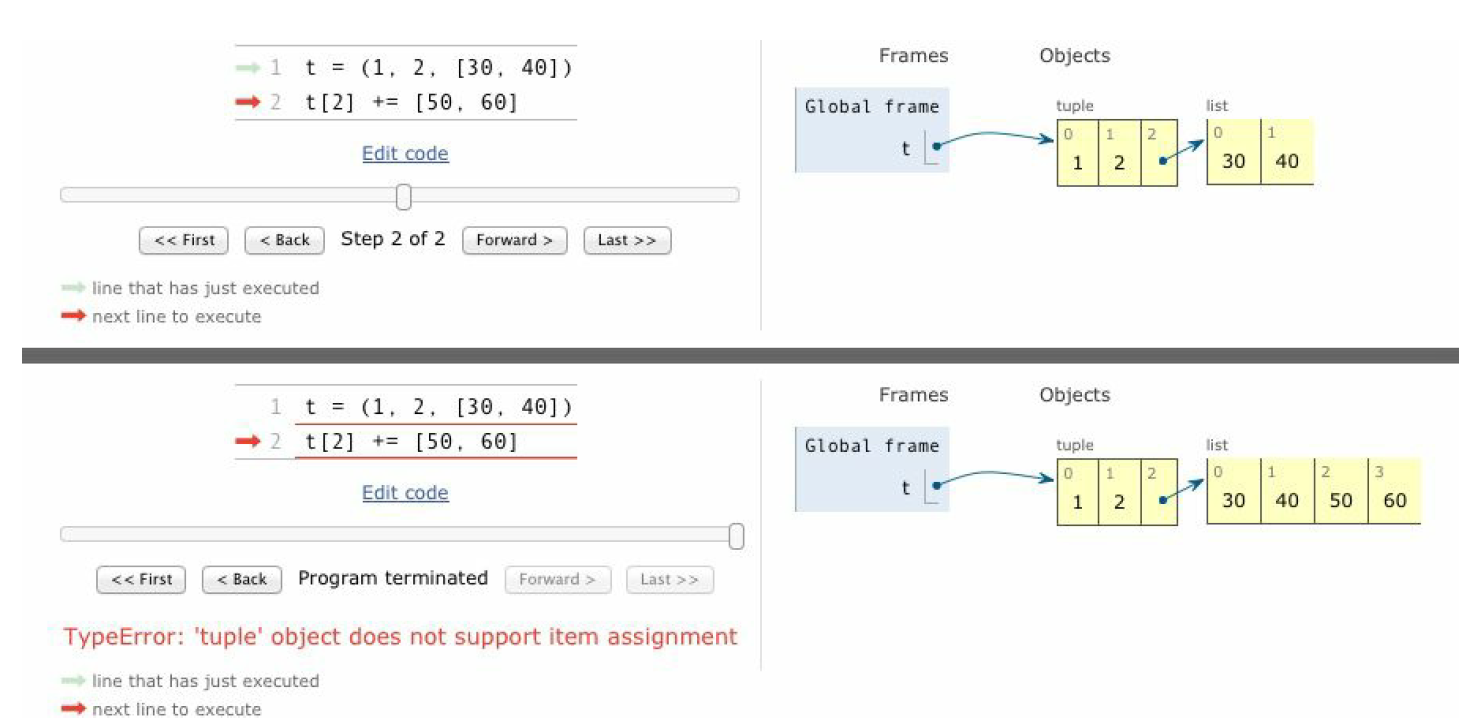